1. What is a Decision Tree, and how does it work?

--> A Decision Tree is a flow‑chart‑like model that recursively splits the data into subsets based on feature values, forming a tree of decision rules. Each internal node represents a test on a feature, every branch corresponds to an outcome of that test, and each leaf holds a predicted class (classification) or value (regression). The algorithm chooses splits that maximize “purity” in the child nodes, eventually yielding a set of simple, interpretable if‑then rules. During prediction, a sample follows the path defined by its feature values until it reaches a leaf, where the stored label/value is returned.

---

2. What are impurity measures in Decision Trees?

--> Impurity measures quantify how mixed the classes are within a node. Common metrics are **Gini Impurity** and **Entropy**; lower values indicate purer nodes. The tree algorithm evaluates all candidate splits and selects the one that most reduces impurity (highest information gain) to create more homogeneous children. These measures guide the tree toward partitions that improve predictive accuracy.

---

3. What is the mathematical formula for Gini Impurity?

--> For a node with $K$ classes and class proportions $p_1, p_2, …, p_K$, the Gini Impurity is

$$
\text{Gini} \;=\; 1 - \sum_{k=1}^{K} p_k^{\,2}.
$$

It equals zero when the node is perfectly pure (all samples belong to one class) and approaches its maximum when classes are evenly mixed.

---

4. What is the mathematical formula for Entropy?

--> Entropy (Shannon entropy) for a node with class proportions $p_k$ is

$$
\text{Entropy} \;=\; - \sum_{k=1}^{K} p_k \log_2 p_k.
$$

Entropy is zero for a pure node and increases as the class distribution becomes more uniform, reaching its maximum at equal class proportions.

---

5. What is Information Gain, and how is it used in Decision Trees?

--> Information Gain is the reduction in impurity achieved by splitting a node. Mathematically,

$$
\text{IG} = \text{Impurity(parent)} \;-\; \bigl[\,w_L \,\text{Impurity(left)} + w_R \,\text{Impurity(right)}\bigr],
$$

where $w_L, w_R$ are the child weights (proportional sample counts). The algorithm evaluates IG for all possible splits and chooses the split with the highest gain, iteratively growing the tree.

---

6. What is the difference between Gini Impurity and Entropy?

--> Both measure class mixing, but Gini is quadratic while Entropy is logarithmic. Gini often produces similar splits but is computationally lighter because it avoids logarithms, making it the default in many libraries. Entropy has stronger theoretical roots in information theory and can yield slightly different trees when class frequencies are extreme. In practice, their predictive performance is usually comparable.

---

7. What is the mathematical explanation behind Decision Trees?

--> Decision Trees implement a greedy, top‑down search for a set of splitting rules that locally maximize impurity reduction. At each node, the algorithm evaluates every feature and possible split‑point, computes the weighted impurity of resulting children, and chooses the split with highest Information Gain. This heuristic search approximates the optimal partitioning of the feature space but doesn’t guarantee a globally optimal tree, trading exhaustive search for computational feasibility.

---

8. What is Pre‑Pruning in Decision Trees?

--> Pre‑pruning (early stopping) halts tree growth before nodes become overly specific. Criteria include minimum samples per leaf, maximum depth, minimum impurity decrease, or maximum number of leaves. By limiting complexity during construction, pre‑pruning mitigates overfitting and reduces training time at the cost of potentially missing subtle patterns.

---

9. What is Post‑Pruning in Decision Trees?

--> Post‑pruning first grows a full tree and then prunes back nodes that do not improve validation performance. Techniques like cost‑complexity pruning (CART) or reduced‑error pruning iteratively replace subtrees with leaves when the replacement lowers a penalty combining error and tree size. This two‑step approach often yields a simpler, more generalizable model than pre‑pruning alone.

---

10. What is the difference between Pre‑Pruning and Post‑Pruning?

--> Pre‑pruning prevents certain splits from ever occurring, using heuristics during growth, whereas post‑pruning allows full growth and then removes unnecessary branches based on validation evidence. Pre‑pruning is faster but risks underfitting by stopping too early; post‑pruning is computationally heavier but typically achieves a better bias–variance trade‑off.

---

11. What is a Decision Tree Regressor?

--> A Decision Tree Regressor predicts continuous outputs by partitioning the feature space and storing an average target value in each leaf. Splits are chosen by minimizing variance (mean‑squared error) instead of classification impurity. The resulting piecewise‑constant function can capture non‑linear relationships but may produce sharp discontinuities at split boundaries.

---

12. What are the advantages and disadvantages of Decision Trees?

--> *Advantages*: easy to interpret, handle mixed data types, require little preprocessing, capture non‑linear relations, and scale to large datasets.
*Disadvantages*: prone to overfitting, unstable (small data changes can alter the tree), biased toward splits with many levels, and less accurate than ensemble methods like Random Forests or Gradient Boosting.

---

13. How does a Decision Tree handle missing values?

--> Many implementations use surrogate splits: if the primary feature is missing, the algorithm follows an alternative split that best mimics the primary decision. Simpler approaches include sending missing values to the child with higher sample weight or treating “missing” as its own categorical level. Nonetheless, preprocessing imputation is often recommended for consistent behavior.

---

14. How does a Decision Tree handle categorical features?

--> A categorical feature is partitioned by grouping its categories: the algorithm searches all (or heuristically selected) subsets of categories for the split that maximizes Information Gain. Some libraries (e.g., CART in scikit‑learn v1.1+) handle this natively; others require one‑hot or ordinal encoding. Decision Trees naturally support non‑ordinal splits without assuming numeric order.

---

15. What are some real‑world applications of Decision Trees?

--> Decision Trees underpin credit‑risk scoring, medical diagnosis support, churn prediction, customer segmentation, and rule‑based fraud detection because their transparent rules aid regulatory compliance. In operations, they guide decision‑support systems for loan approval, equipment maintenance (predictive failure), and marketing campaign targeting. They also serve as base learners in ensemble methods powering winning Kaggle solutions.

---


In [1]:
#Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Initialize and train Decision Tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy on Iris dataset: {accuracy:.3f}")


Decision Tree Accuracy on Iris dataset: 0.921


In [2]:
#Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = DecisionTreeClassifier(criterion='gini', random_state=0)
clf.fit(X_train, y_train)

print("Feature importances:")
for name, score in zip(data.feature_names, clf.feature_importances_):
    print(f"{name}: {score:.3f}")


Feature importances:
sepal length (cm): 0.018
sepal width (cm): 0.000
petal length (cm): 0.030
petal width (cm): 0.953


In [3]:
#Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train a Decision Tree using Entropy as the splitting criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Accuracy using Entropy:", round(accuracy, 3))


Decision Tree Accuracy using Entropy: 0.921


In [4]:
#  Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.5501739317092635


In [5]:
# Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf_default = DecisionTreeClassifier(random_state=0)
clf_default.fit(X_train, y_train)

clf_limited = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_limited.fit(X_train, y_train)

acc_full = accuracy_score(y_test, clf_default.predict(X_test))
acc_limited = accuracy_score(y_test, clf_limited.predict(X_test))

print(f"Full tree accuracy      : {acc_full:.3f}")
print(f"Max depth = 3 accuracy  : {acc_limited:.3f}")


Full tree accuracy      : 0.974
Max depth = 3 accuracy  : 0.947


In [6]:
# Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf_default = DecisionTreeClassifier(random_state=0)
clf_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=0)

clf_default.fit(X_train, y_train)
clf_split5.fit(X_train, y_train)

acc_default = accuracy_score(y_test, clf_default.predict(X_test))
acc_split5 = accuracy_score(y_test, clf_split5.predict(X_test))

print(f"Default min_samples_split accuracy: {acc_default:.3f}")
print(f"min_samples_split=5 accuracy      : {acc_split5:.3f}")


Default min_samples_split accuracy: 0.974
min_samples_split=5 accuracy      : 0.947


In [7]:
#Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Without scaling
clf_plain = DecisionTreeClassifier(random_state=0)
clf_plain.fit(X_train, y_train)
acc_plain = accuracy_score(y_test, clf_plain.predict(X_test))

# With scaling
pipe_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(random_state=0))
])
pipe_scaled.fit(X_train, y_train)
acc_scaled = accuracy_score(y_test, pipe_scaled.predict(X_test))

print(f"Accuracy without scaling: {acc_plain:.3f}")
print(f"Accuracy with scaling   : {acc_scaled:.3f}")


Accuracy without scaling: 0.974
Accuracy with scaling   : 0.974


In [8]:
#Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("OvR Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred), 3))


OvR Decision Tree Accuracy: 0.921


In [9]:
#Write a Python program to train a Decision Tree Classifier and display the feature importance scores
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print("Feature importances:")
for name, score in zip(data.feature_names, clf.feature_importances_):
    print(f"{name}: {score:.3f}")


Feature importances:
sepal length (cm): 0.013
sepal width (cm): 0.000
petal length (cm): 0.429
petal width (cm): 0.558


In [10]:
#Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

reg1 = DecisionTreeRegressor(max_depth=5, random_state=0)
reg2 = DecisionTreeRegressor(random_state=0)  # full tree

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

mse1 = mean_squared_error(y_test, reg1.predict(X_test))
mse2 = mean_squared_error(y_test, reg2.predict(X_test))

print(f"MSE (max_depth=5): {mse1:.3f}")
print(f"MSE (unrestricted): {mse2:.3f}")


MSE (max_depth=5): 0.527
MSE (unrestricted): 0.517


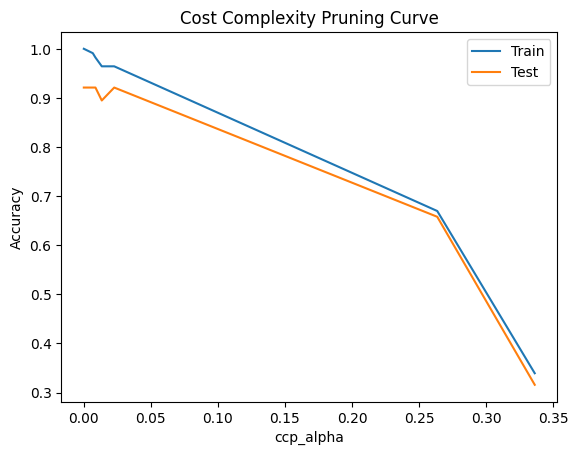

In [11]:
#Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_scores, test_scores = [], []
for ccp in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

plt.plot(ccp_alphas, train_scores, label="Train")
plt.plot(ccp_alphas, test_scores, label="Test")
plt.xlabel("ccp_alpha"); plt.ylabel("Accuracy")
plt.title("Cost Complexity Pruning Curve")
plt.legend(); plt.show()


In [12]:
#Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=load_iris().target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



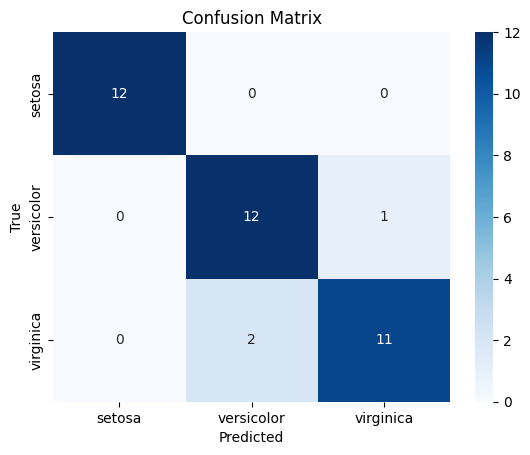

In [13]:
#Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=load_iris().target_names, yticklabels=load_iris().target_names)
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [14]:
#Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", round(grid.best_score_, 3))


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.938
